__It is Necessary to check what data you have__

In [7]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

print("Iris feature names:",iris.feature_names)
print("\n*********\n")
print("Iris target names:",iris.target_names)
print("\n*********\n")
print("Data shape:",X.shape)
print("\n*********\n")
print("Target shape:",y.shape)
print("\n*********\n")
pd.DataFrame(X,y,iris.feature_names)

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

*********

Iris target names: ['setosa' 'versicolor' 'virginica']

*********

Data shape: (150, 4)

*********

Target shape: (150,)

*********



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


#Perceptron

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Perceptron class
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)                   #assign random seed
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   #Gaussian distribution
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))               # Update     !!! Note: target- output
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) <= 0, -1, 1)

In [ ]:
# Train & Test perceptron
ppn= Perceptron(eta=0.01, n_iter=20)

ppn.fit(X[:100,:],y[:100])

#Plot Errors vs Epochs
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of Errors')
plt.show()
### Using ppn.predict, evaluate the accuracy of perceptron.

In [ ]:
#Decision Boundary
ppn.fit(X[:100,[0,1]],y[:100])
plt.scatter(X[:100,0],X[:100,1],c=y[:100])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
t=np.linspace(X[:100,0].min(),X[:100,0].max(),1000)
plt.plot(t,(-ppn.w_[1]*t+ppn.w_[0])/ppn.w_[2])

Appendix

In [8]:
print(np.random.RandomState(10).rand(3))
print(np.random.RandomState(10).rand(3))
print(np.random.RandomState(11).rand(3))

[0.77132064 0.02075195 0.63364823]
[0.77132064 0.02075195 0.63364823]
[0.18026969 0.01947524 0.46321853]


#Adaline

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Adaline class
class adaline(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale = 0.01, size =1+X.shape[1])
    self.cost_ = []
    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta*X.T.dot(errors)                       #Update     !!! Note: target- activation
      cost = (errors**2).sum()/2.0                                  # A cost function
      self.cost_.append(cost)
    return self


  def net_input(self, X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self,X):           ### A linear activation function: Adaline // A sigmoid function: Logistic regression
    return X
    #return 1/(1+np.exp(-X))

  def predict(self, X):
    return  np.where(self.net_input(X) <0, -1,1)

In [ ]:
# Train & Test perceptron
adn= adaline(eta=0.01, n_iter=20)    #eta needs to be chosen as a small value

adn.fit(X[:100,:],y[:100])

#Plot Errors vs Epochs
plt.plot(range(1,len(adn.cost_)+1), adn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost function value')
plt.show()
### Using ppn.predict, evaluate the accuracy of perceptron.

Appendix

In [5]:
#Split data into two types: for train and test
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X=np.random.rand(10)
y=[0,1,1,0,1,0,0,0,1,1]
train_input, test_input, train_target, test_target = train_test_split( X , y, test_size=0.4, random_state=1)    #default(Test_size=0.3)
print("Train_input = {},\nTest input = {},\nTraining_target = {},\nTest_target = {}".format(train_input, test_input, train_target, test_target ))

Train_input = [0.36045443 0.39984812 0.35870208 0.77106869 0.44727437 0.00273856],
Test input = [0.03428952 0.27600576 0.16913987 0.71273645],
Training_target = [0, 0, 1, 0, 1, 0],
Test_target = [1, 1, 0, 1]


In [20]:
# Standard scaler
from sklearn.preprocessing import StandardScaler
'''
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
'''

#Support Vector Machine(SVM)

In [ ]:
# C=1
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0)  # For large C, Hard svm; For small C soft svm
'''
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0,
                       shrinking=True, probability=False, tol=0.001, cache_size=200,
                        class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
                         break_ties=False, random_state=None)
'''

# training
svm.fit(X_train, y_train)

# predict
predictions = svm.predict(X_test)

score = metrics.accuracy_score(y_test, predictions)
print("Prediction = \n{}".format(svm.predict(X_test)))
print("Test = \n{}".format(y_test))
print('Accuracy : %.3f'%score)

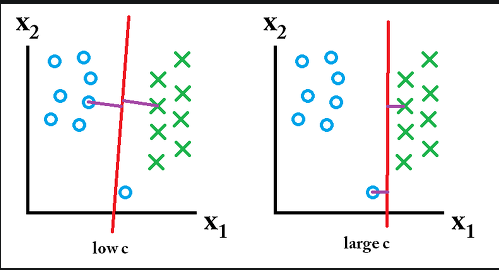
출처:https://wikidocs.net/26206

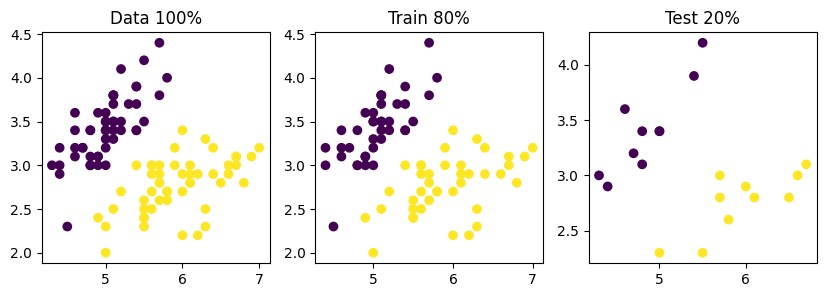

In [196]:
from sklearn import svm, datasets

X_train, X_test, y_train, y_test = train_test_split(X[:100,[0,1]], y[:100], test_size = 0.2, random_state=0)
fig, axes = plt.subplots(1,3,figsize=(10,3))
axes[0].scatter(X[:100,0],X[:100,1],c=y[50:])
axes[1].scatter(X_train[:,0],X_train[:,1],c=y_train)
axes[2].scatter(X_test[:,0],X_test[:,1],c=y_test)
axes[0].set_title("Data 100%")
axes[1].set_title("Train 80%")
axes[2].set_title("Test 20%")

plt.show()

[[ 6.31552059 -5.26257464]] 0.0


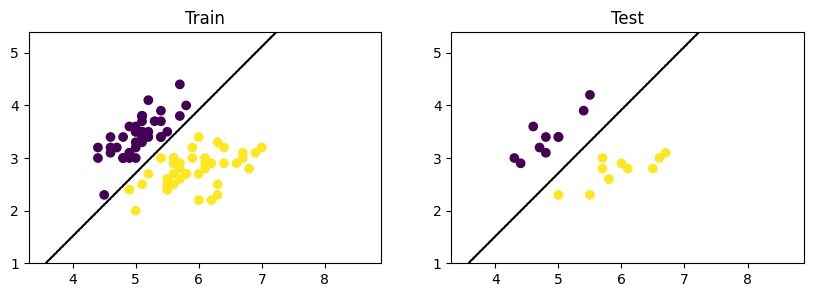

In [199]:
# make a classifier and fit on training data
clf_1 = svm.SVC(kernel='linear', C=100)
clf_1.fit(X_train, y_train)
print(clf_1.coef_,clf_1.coef0)

# Plot decision function on training and test data
fig, axes = plt.subplots(1,2,figsize=(10,3))
axes[0].scatter(X_train[:,0],X_train[:,1],c=y_train)
axes[1].scatter(X_test[:,0],X_test[:,1],c=y_test)
axes[0].set_title("Train")
axes[1].set_title("Test")

h=0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axes[0].contour(xx, yy, Z,  colors='k', levels=[-1,0,1],linestyles=['--','-','--'])
axes[1].contour(xx, yy, Z,  colors='k', levels=[-1,0,1],linestyles=['--','-','--'])

Appendix

https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-3%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM-%EC%8B%A4%EC%8A%B5

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


None


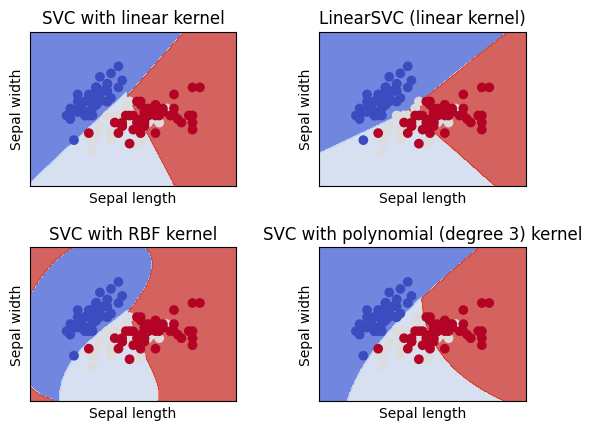

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#Decision Tree

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:], test_size = 0.2, random_state=0)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

'''
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
criterion, max_depth, mini_samples_split, min_samples_leaf
'''
# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.3846153

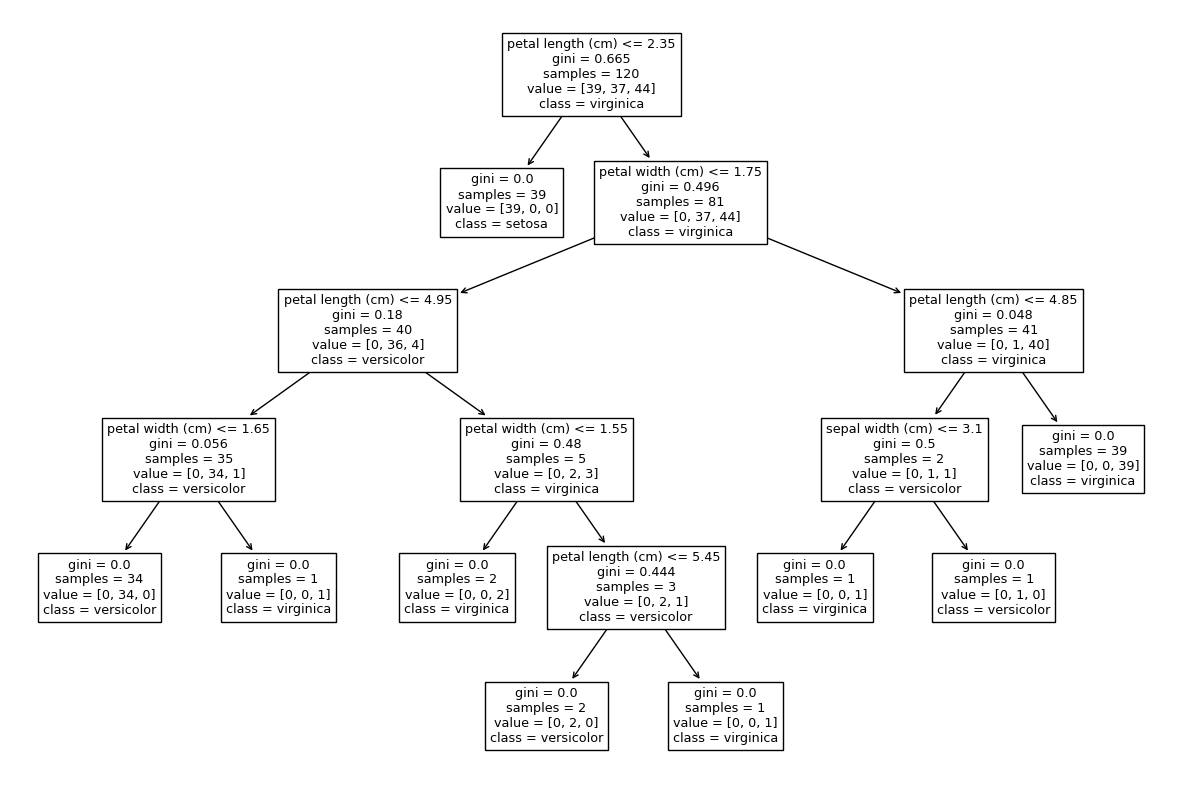

In [211]:
from sklearn import tree

plt.figure( figsize=(15,10) )
tree.plot_tree(classifier, class_names=iris.target_names, feature_names=iris.feature_names, impurity=True)

Appendix

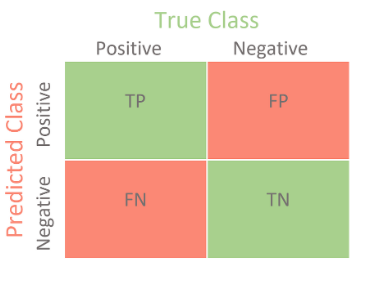





$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

$Accuracy = \frac{TP+TN}{TP+TN+FN+FP}$

$f_1 score = 2\times \frac{precision\times recall}{precision+ recall}$


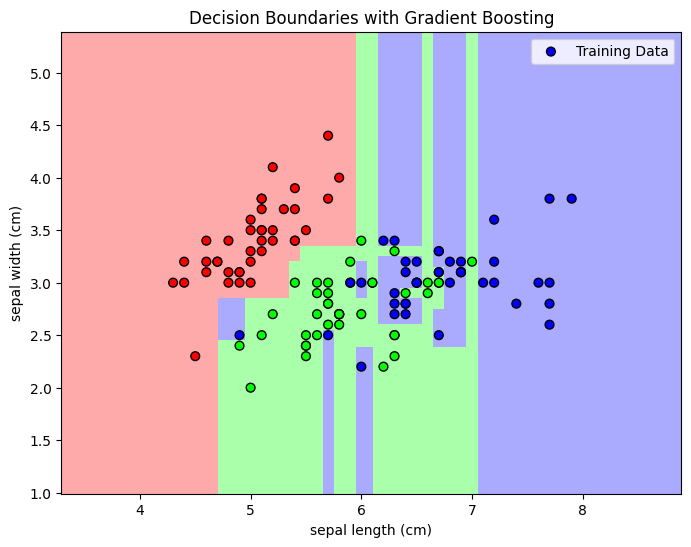

In [215]:
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1]], y[:], test_size = 0.2, random_state=0)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

'''
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
criterion, max_depth, mini_samples_split, min_samples_leaf
'''
# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)
# Plot the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, marker='o', edgecolor='k', s=40, label='Training Data')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Decision Boundaries with Gradient Boosting")
plt.legend()

plt.show()

#K-Nearest neighbor(KNN)

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.69      0.72        13
           2       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30



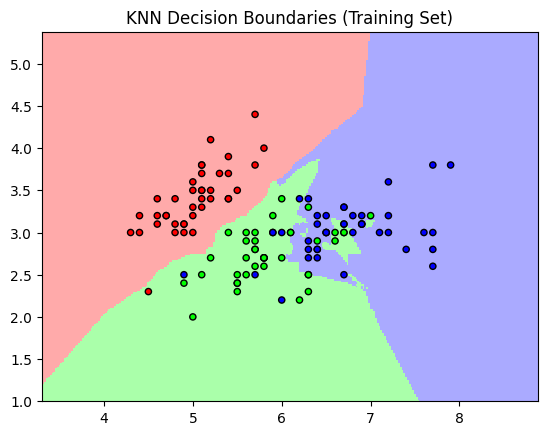

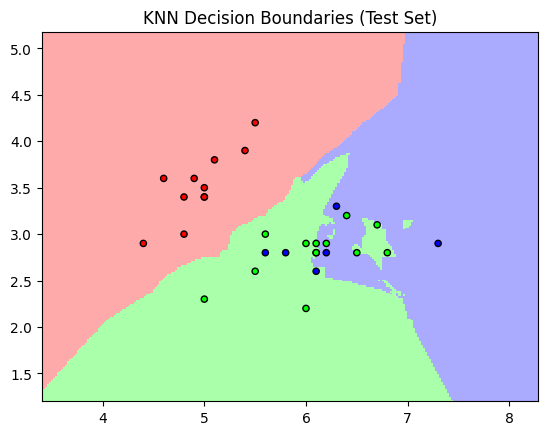

In [235]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1]], y[:], test_size = 0.2, random_state=0)

neigh=KNeighborsClassifier(n_neighbors=4)

'''
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30,
                                             p=2, metric='minkowski', metric_params=None, n_jobs=None)
'''
neigh.fit(X_train,y_train)

neigh.score(X_test,y_test)
y_pred = neigh.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# Plotting decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Select the first two features for plotting (you may modify as needed)
X_plot = X_train[:, :2]
X_test_plot = X_test[:, :2]

# Plot decision boundaries on the training set
plot_decision_boundary(X_plot, y_train, classifier, "KNN Decision Boundaries (Training Set)")

# Plot decision boundaries on the test set
plot_decision_boundary(X_test_plot, y_test, classifier, "KNN Decision Boundaries (Test Set)")

###Gradient Boosting Decision Tree(GBDT)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



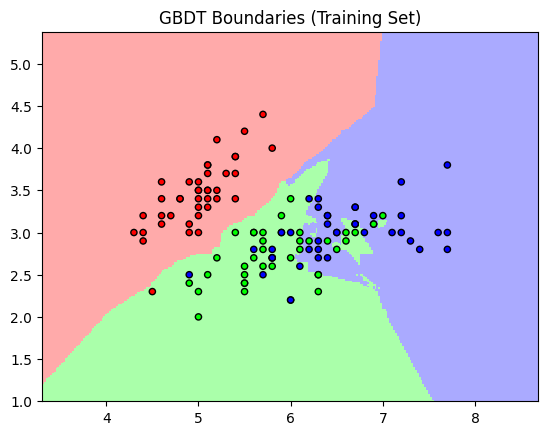

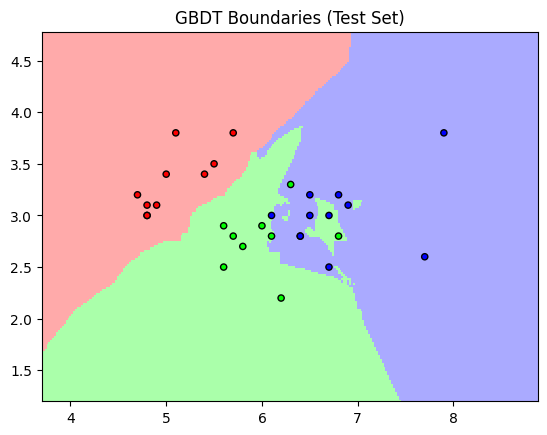

In [238]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
'''
Parameters in GradientBoostingClassifier
loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0
'''
# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)
plot_decision_boundary(X_train[:,[0,1]], y_train, gb_classifier, "GBDT Boundaries (Training Set)")
plot_decision_boundary(X_test[:,[0,1]], y_test, gb_classifier, "GBDT Boundaries (Test Set)")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



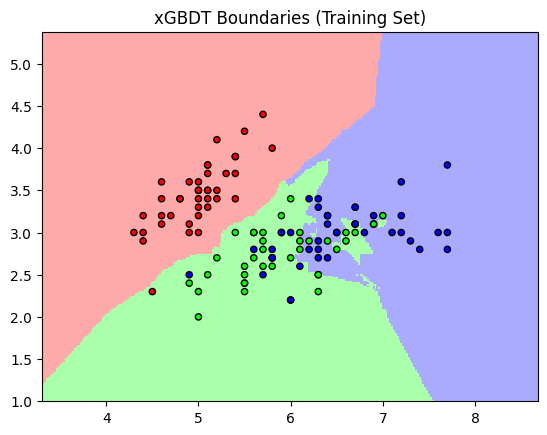

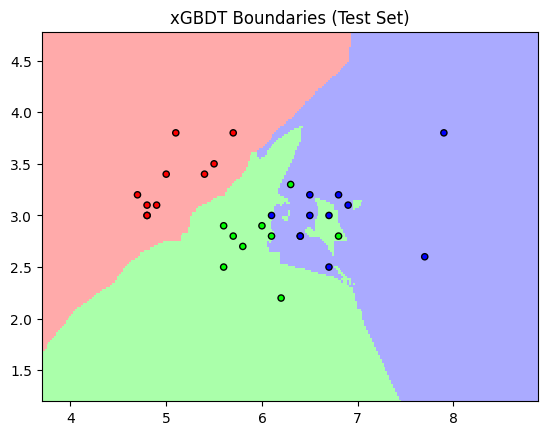

In [239]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = XGBClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
plot_decision_boundary(X_train[:,[0,1]], y_train, classifier, "xGBDT Boundaries (Training Set)")
plot_decision_boundary(X_test[:,[0,1]], y_test, classifier, "xGBDT Boundaries (Test Set)")